In [126]:
import numpy as np
import pandas as pd
from sklearn.cluster import AgglomerativeClustering,KMeans,DBSCAN
import scipy.cluster.hierarchy as sch
from sklearn.preprocessing import normalize
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

In [59]:
df=pd.read_csv(r'C:\Users\my computer\Documents\Data Science\Assignments\Clustering\EastWestAirlines.csv')
df

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


In [60]:
df=df.drop(['ID#'],axis=1)
df

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,28143,0,1,1,1,174,1,0,0,7000,0
1,19244,0,1,1,1,215,2,0,0,6968,0
2,41354,0,1,1,1,4123,4,0,0,7034,0
3,14776,0,1,1,1,500,1,0,0,6952,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,1
3995,64385,0,1,1,1,981,5,0,0,1395,1
3996,73597,0,3,1,1,25447,8,0,0,1402,1
3997,54899,0,1,1,1,500,1,500,1,1401,0


In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Balance            3999 non-null   int64
 1   Qual_miles         3999 non-null   int64
 2   cc1_miles          3999 non-null   int64
 3   cc2_miles          3999 non-null   int64
 4   cc3_miles          3999 non-null   int64
 5   Bonus_miles        3999 non-null   int64
 6   Bonus_trans        3999 non-null   int64
 7   Flight_miles_12mo  3999 non-null   int64
 8   Flight_trans_12    3999 non-null   int64
 9   Days_since_enroll  3999 non-null   int64
 10  Award?             3999 non-null   int64
dtypes: int64(11)
memory usage: 343.8 KB


In [62]:
df=pd.DataFrame(normalize(df),columns=df.columns)
df

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,0.970414,0.0,0.000034,0.000034,0.000034,0.006000,0.000034,0.000000,0.000000,0.241371,0.000000
1,0.940209,0.0,0.000049,0.000049,0.000049,0.010504,0.000098,0.000000,0.000000,0.340437,0.000000
2,0.981113,0.0,0.000024,0.000024,0.000024,0.097817,0.000095,0.000000,0.000000,0.166880,0.000000
3,0.904428,0.0,0.000061,0.000061,0.000061,0.030605,0.000061,0.000000,0.000000,0.425527,0.000000
4,0.912226,0.0,0.000037,0.000009,0.000009,0.404078,0.000243,0.019383,0.000037,0.064718,0.000009
...,...,...,...,...,...,...,...,...,...,...,...
3994,0.905810,0.0,0.000049,0.000049,0.000049,0.417949,0.000196,0.009805,0.000049,0.068784,0.000049
3995,0.999649,0.0,0.000016,0.000016,0.000016,0.015231,0.000078,0.000000,0.000000,0.021659,0.000016
3996,0.944948,0.0,0.000039,0.000013,0.000013,0.326726,0.000103,0.000000,0.000000,0.018001,0.000013
3997,0.999592,0.0,0.000018,0.000018,0.000018,0.009104,0.000018,0.009104,0.000018,0.025509,0.000000


## Hierarchial Clustering

#### Complete Linkage

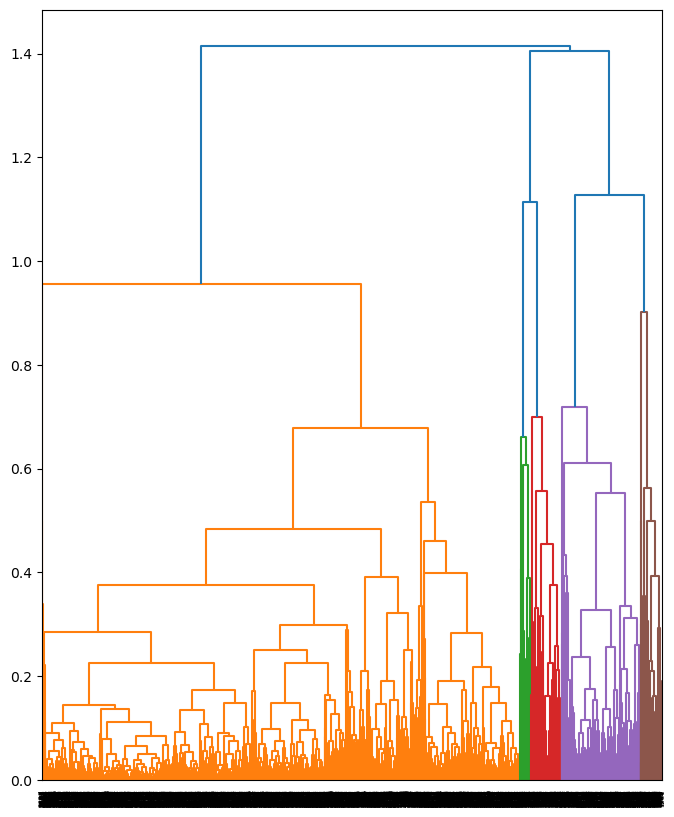

In [63]:
#Dendogram
plt.figure(figsize=(8,10))
dendo=sch.dendrogram(sch.linkage(df,'complete'))

In [64]:
#Create Clusters
hc=AgglomerativeClustering(n_clusters=5, affinity='euclidean',linkage='complete')
hc

AgglomerativeClustering(affinity='euclidean', linkage='complete', n_clusters=5)

In [65]:
y=hc.fit_predict(df)
y

C:\Users\my computer\anaconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [66]:
Clusters=pd.DataFrame(y,columns=['Clusters'])
Clusters

,Clusters
0,0
1,0
2,0
3,0
4,0
...,...
3994,0
3995,0
3996,0
3997,0


In [67]:
Clusters.value_counts()

Clusters
0           3086
1            509
3            197
2            137
4             70
dtype: int64

In [68]:
df1=df.copy()
df1['clusters_complete']=hc.labels_
df1

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clusters_complete
0,0.970414,0.0,0.000034,0.000034,0.000034,0.006000,0.000034,0.000000,0.000000,0.241371,0.000000,0
1,0.940209,0.0,0.000049,0.000049,0.000049,0.010504,0.000098,0.000000,0.000000,0.340437,0.000000,0
2,0.981113,0.0,0.000024,0.000024,0.000024,0.097817,0.000095,0.000000,0.000000,0.166880,0.000000,0
3,0.904428,0.0,0.000061,0.000061,0.000061,0.030605,0.000061,0.000000,0.000000,0.425527,0.000000,0
4,0.912226,0.0,0.000037,0.000009,0.000009,0.404078,0.000243,0.019383,0.000037,0.064718,0.000009,0
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,0.905810,0.0,0.000049,0.000049,0.000049,0.417949,0.000196,0.009805,0.000049,0.068784,0.000049,0
3995,0.999649,0.0,0.000016,0.000016,0.000016,0.015231,0.000078,0.000000,0.000000,0.021659,0.000016,0
3996,0.944948,0.0,0.000039,0.000013,0.000013,0.326726,0.000103,0.000000,0.000000,0.018001,0.000013,0
3997,0.999592,0.0,0.000018,0.000018,0.000018,0.009104,0.000018,0.009104,0.000018,0.025509,0.000000,0


In [69]:
df1.groupby('clusters_complete').agg(['mean']).reset_index()

,clusters_complete,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
,,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
0,0,0.968406,0.003388,0.000044,0.000035,0.000035,0.151235,0.000222,0.006808,0.000021,0.096562,0.000006
1,1,0.750886,0.001704,0.000076,0.000036,0.000035,0.629525,0.000433,0.013559,0.000045,0.097589,0.000018
2,2,0.287843,0.002322,0.000090,0.000042,0.000041,0.918100,0.000503,0.014440,0.000042,0.154908,0.000041
3,3,0.783834,0.001143,0.000183,0.000183,0.000183,0.122780,0.000452,0.006390,0.000020,0.569605,0.000020
4,4,0.308412,0.000000,0.000242,0.000241,0.000241,0.121704,0.000522,0.006609,0.000030,0.916991,0.000035


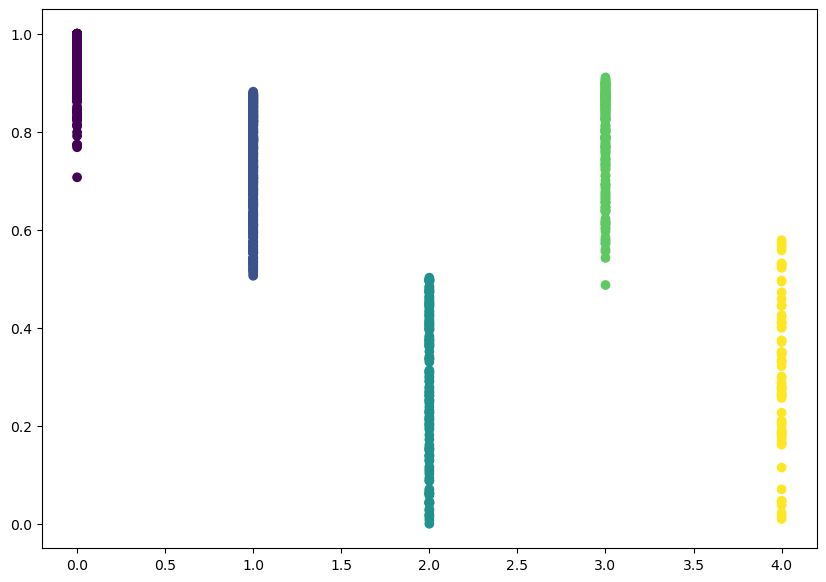

In [70]:
# Plotting Clusters
plt.figure(figsize=(10, 7))  
plt.scatter(df1['clusters_complete'],df1['Balance'], c=hc.labels_) 

#### Single Linkage

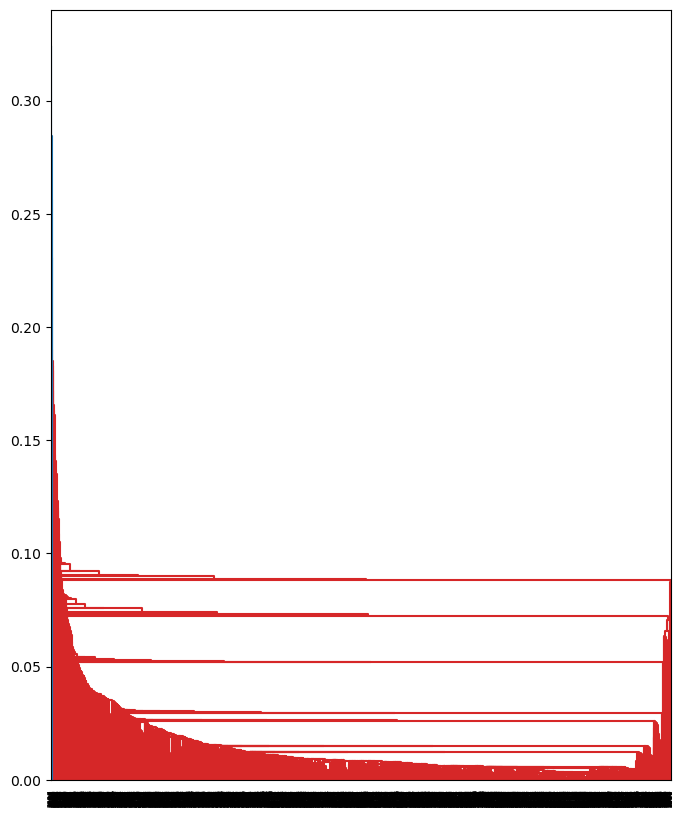

In [71]:
#Dendogram
plt.figure(figsize=(8,10))
dendo=sch.dendrogram(sch.linkage(df,'single'))

In [72]:
#Create Clusters
hc1=AgglomerativeClustering(n_clusters=5, affinity='euclidean',linkage='single')
hc1

AgglomerativeClustering(affinity='euclidean', linkage='single', n_clusters=5)

In [73]:
y1=hc1.fit_predict(df)
y1

C:\Users\my computer\anaconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [74]:
Clusters1=pd.DataFrame(y1,columns=['Clusters1'])
Clusters1

,Clusters1
0,0
1,0
2,0
3,0
4,0
...,...
3994,0
3995,0
3996,0
3997,0


In [75]:
Clusters1.value_counts()

Clusters1
0            3993
1               2
2               2
3               1
4               1
dtype: int64

In [76]:
df2=df.copy()
df2['clusters_single']=hc1.labels_
df2

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clusters_single
0,0.970414,0.0,0.000034,0.000034,0.000034,0.006000,0.000034,0.000000,0.000000,0.241371,0.000000,0
1,0.940209,0.0,0.000049,0.000049,0.000049,0.010504,0.000098,0.000000,0.000000,0.340437,0.000000,0
2,0.981113,0.0,0.000024,0.000024,0.000024,0.097817,0.000095,0.000000,0.000000,0.166880,0.000000,0
3,0.904428,0.0,0.000061,0.000061,0.000061,0.030605,0.000061,0.000000,0.000000,0.425527,0.000000,0
4,0.912226,0.0,0.000037,0.000009,0.000009,0.404078,0.000243,0.019383,0.000037,0.064718,0.000009,0
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,0.905810,0.0,0.000049,0.000049,0.000049,0.417949,0.000196,0.009805,0.000049,0.068784,0.000049,0
3995,0.999649,0.0,0.000016,0.000016,0.000016,0.015231,0.000078,0.000000,0.000000,0.021659,0.000016,0
3996,0.944948,0.0,0.000039,0.000013,0.000013,0.326726,0.000103,0.000000,0.000000,0.018001,0.000013,0
3997,0.999592,0.0,0.000018,0.000018,0.000018,0.009104,0.000018,0.009104,0.000018,0.025509,0.000000,0


In [77]:
df2.groupby('clusters_single').agg(['mean']).reset_index()

,clusters_single,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
,,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
0,0,0.897316,0.002590,0.000060,0.000046,0.000046,0.236171,0.000273,0.007462,0.000023,0.136249,0.000010
1,1,0.555913,0.000000,0.000145,0.000145,0.000145,0.555913,0.003285,0.555913,0.003285,0.256339,0.000000
2,2,0.740288,0.670463,0.000428,0.000428,0.000428,0.000000,0.000000,0.000000,0.000000,0.002656,0.000000
3,3,0.000000,0.000000,0.000149,0.000149,0.000149,0.819511,0.002686,0.315805,0.000746,0.478185,0.000149
4,4,0.562926,0.181020,0.000168,0.000042,0.000042,0.662128,0.001810,0.387209,0.001178,0.248992,0.000042


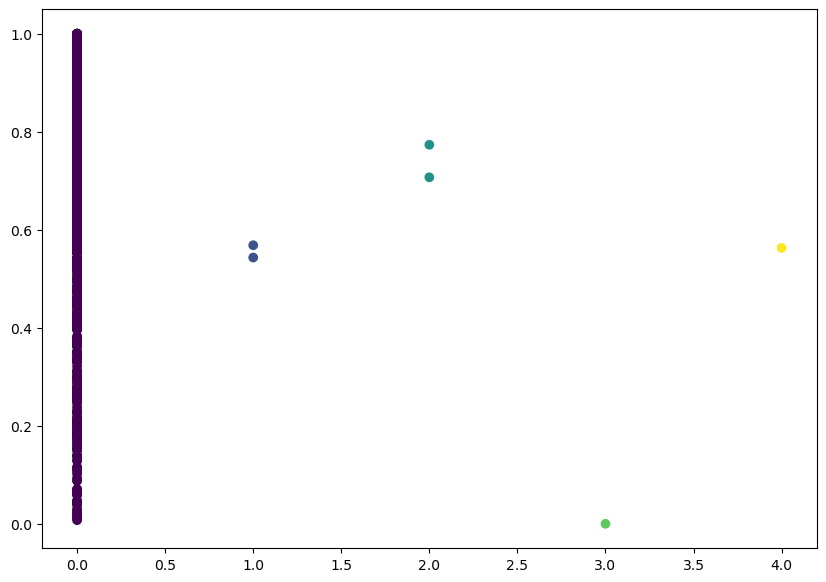

In [78]:
# Plotting Clusters
plt.figure(figsize=(10, 7))  
plt.scatter(df2['clusters_single'],df2['Balance'], c=hc1.labels_) 

#### Mean Linkage

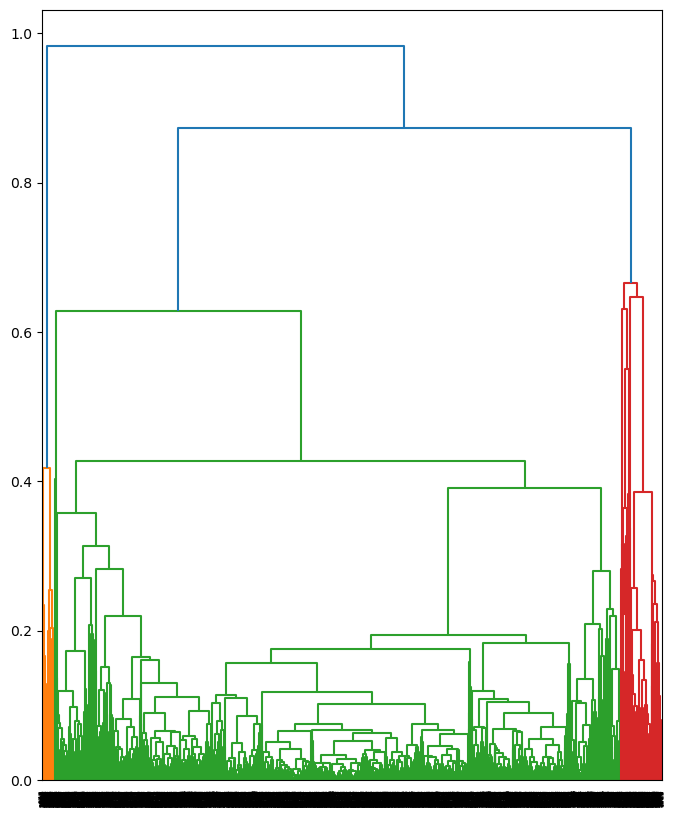

In [79]:
#Dendogram
plt.figure(figsize=(8,10))
dendo=sch.dendrogram(sch.linkage(df,'average'))

In [80]:
#Create Clusters
hc2=AgglomerativeClustering(n_clusters=5, affinity='euclidean',linkage='average')
hc2

AgglomerativeClustering(affinity='euclidean', linkage='average', n_clusters=5)

In [81]:
y2=hc2.fit_predict(df)
y2

C:\Users\my computer\anaconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


array([2, 2, 2, ..., 2, 2, 2], dtype=int64)

In [82]:
Clusters2=pd.DataFrame(y2,columns=['Clusters2'])
Clusters2

,Clusters2
0,2
1,2
2,2
3,2
4,2
...,...
3994,2
3995,2
3996,2
3997,2


In [83]:
Clusters2.value_counts()

Clusters2
2            3651
3             202
1              87
0              58
4               1
dtype: int64

In [84]:
df3=df.copy()
df3['clusters_mean']=hc2.labels_
df3

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clusters_mean
0,0.970414,0.0,0.000034,0.000034,0.000034,0.006000,0.000034,0.000000,0.000000,0.241371,0.000000,2
1,0.940209,0.0,0.000049,0.000049,0.000049,0.010504,0.000098,0.000000,0.000000,0.340437,0.000000,2
2,0.981113,0.0,0.000024,0.000024,0.000024,0.097817,0.000095,0.000000,0.000000,0.166880,0.000000,2
3,0.904428,0.0,0.000061,0.000061,0.000061,0.030605,0.000061,0.000000,0.000000,0.425527,0.000000,2
4,0.912226,0.0,0.000037,0.000009,0.000009,0.404078,0.000243,0.019383,0.000037,0.064718,0.000009,2
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,0.905810,0.0,0.000049,0.000049,0.000049,0.417949,0.000196,0.009805,0.000049,0.068784,0.000049,2
3995,0.999649,0.0,0.000016,0.000016,0.000016,0.015231,0.000078,0.000000,0.000000,0.021659,0.000016,2
3996,0.944948,0.0,0.000039,0.000013,0.000013,0.326726,0.000103,0.000000,0.000000,0.018001,0.000013,2
3997,0.999592,0.0,0.000018,0.000018,0.000018,0.009104,0.000018,0.009104,0.000018,0.025509,0.000000,2


In [85]:
df3.groupby('clusters_mean').agg(['mean']).reset_index()

,clusters_mean,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
,,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
0,0,0.534126,0.003755,0.000205,0.000196,0.000193,0.545142,0.001187,0.070337,0.000247,0.555414,0.000083
1,1,0.407684,0.000000,0.000227,0.000227,0.000227,0.072430,0.000415,0.003865,0.000020,0.877760,0.000022
2,2,0.942055,0.003083,0.000053,0.000041,0.000040,0.199444,0.000246,0.006641,0.000021,0.113162,0.000007
3,3,0.397275,0.001937,0.000085,0.000032,0.000032,0.884737,0.000463,0.013036,0.000036,0.114247,0.000031
4,4,0.000000,0.000000,0.000149,0.000149,0.000149,0.819511,0.002686,0.315805,0.000746,0.478185,0.000149


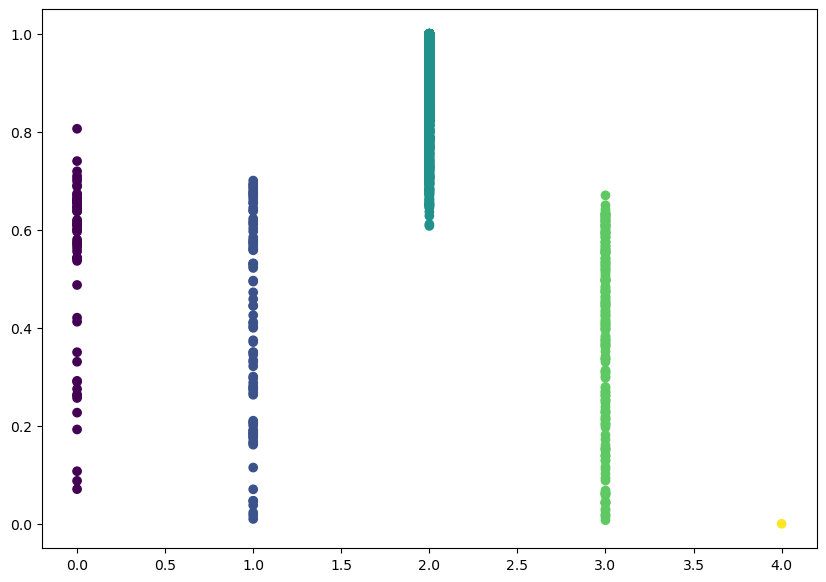

In [86]:
# Plotting Clusters
plt.figure(figsize=(10, 7))  
plt.scatter(df3['clusters_mean'],df3['Balance'], c=hc2.labels_) 

#### Centroid Linkage

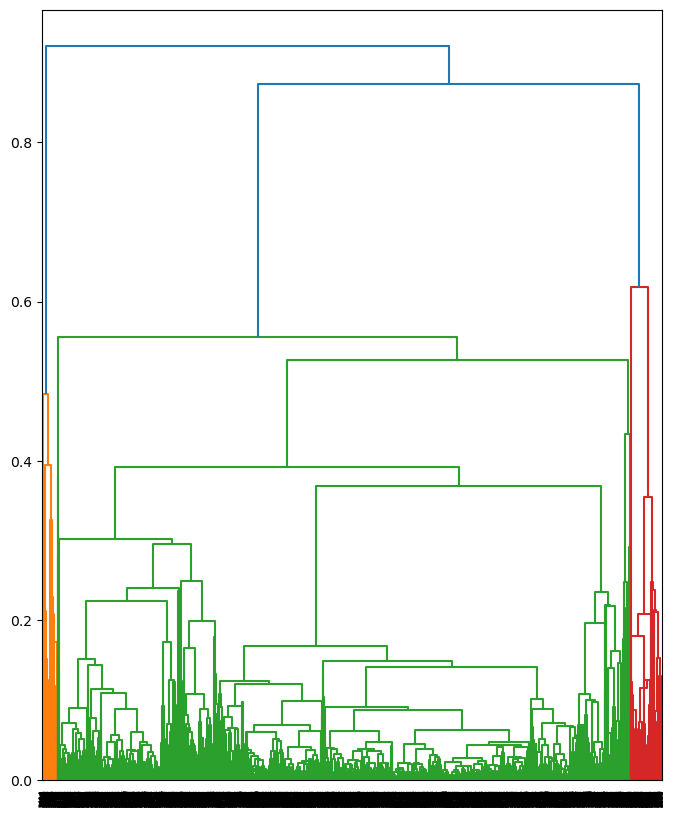

In [87]:
#Dendogram
plt.figure(figsize=(8,10))
dendo=sch.dendrogram(sch.linkage(df,'centroid'))

In [88]:
#Create Clusters
hc3=AgglomerativeClustering(n_clusters=5, affinity='euclidean',linkage='ward')
hc3

AgglomerativeClustering(affinity='euclidean', n_clusters=5)

In [89]:
y3=hc3.fit_predict(df)
y3

C:\Users\my computer\anaconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


array([4, 2, 2, ..., 2, 4, 2], dtype=int64)

In [90]:
Clusters3=pd.DataFrame(y3,columns=['Clusters2'])
Clusters3

,Clusters2
0,4
1,2
2,2
3,2
4,3
...,...
3994,3
3995,4
3996,2
3997,4


In [91]:
Clusters3.value_counts()

Clusters2
2            1547
4            1191
3             579
1             453
0             229
dtype: int64

In [92]:
df4=df.copy()
df4['clusters_centroid']=hc3.labels_
df4

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clusters_centroid
0,0.970414,0.0,0.000034,0.000034,0.000034,0.006000,0.000034,0.000000,0.000000,0.241371,0.000000,4
1,0.940209,0.0,0.000049,0.000049,0.000049,0.010504,0.000098,0.000000,0.000000,0.340437,0.000000,2
2,0.981113,0.0,0.000024,0.000024,0.000024,0.097817,0.000095,0.000000,0.000000,0.166880,0.000000,2
3,0.904428,0.0,0.000061,0.000061,0.000061,0.030605,0.000061,0.000000,0.000000,0.425527,0.000000,2
4,0.912226,0.0,0.000037,0.000009,0.000009,0.404078,0.000243,0.019383,0.000037,0.064718,0.000009,3
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,0.905810,0.0,0.000049,0.000049,0.000049,0.417949,0.000196,0.009805,0.000049,0.068784,0.000049,3
3995,0.999649,0.0,0.000016,0.000016,0.000016,0.015231,0.000078,0.000000,0.000000,0.021659,0.000016,4
3996,0.944948,0.0,0.000039,0.000013,0.000013,0.326726,0.000103,0.000000,0.000000,0.018001,0.000013,2
3997,0.999592,0.0,0.000018,0.000018,0.000018,0.009104,0.000018,0.009104,0.000018,0.025509,0.000000,4


In [93]:
df4.groupby('clusters_centroid').agg(['mean']).reset_index()

,clusters_centroid,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
,,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
0,0,0.652870,0.000983,0.000202,0.000202,0.000202,0.079903,0.000382,0.006354,0.000023,0.679953,0.000018
1,1,0.560544,0.002134,0.000094,0.000052,0.000051,0.755052,0.000516,0.017330,0.000055,0.149671,0.000031
2,2,0.964396,0.001987,0.000046,0.000035,0.000035,0.184097,0.000303,0.008423,0.000024,0.116522,0.000007
3,3,0.877981,0.002331,0.000059,0.000028,0.000027,0.460445,0.000384,0.005802,0.000019,0.079691,0.000011
4,4,0.992808,0.005247,0.000039,0.000038,0.000038,0.028459,0.000074,0.004966,0.000018,0.080081,0.000003


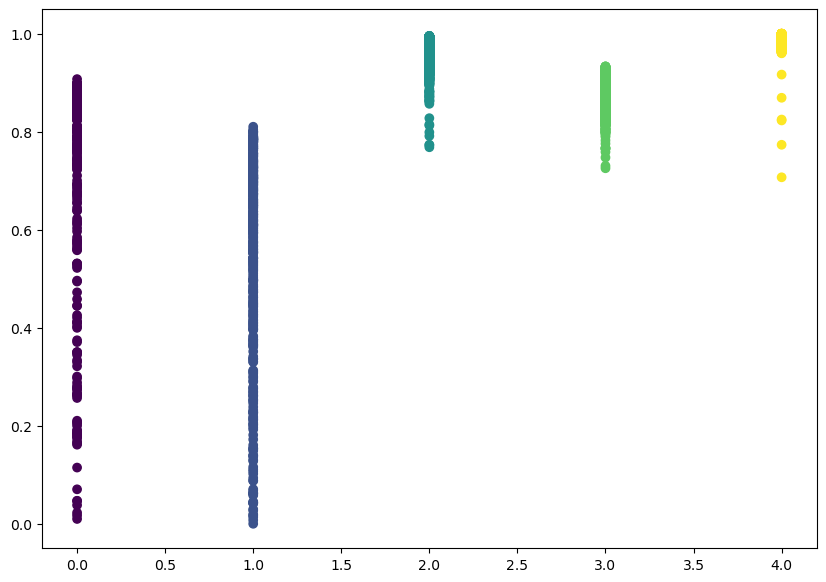

In [94]:
# Plotting Clusters
plt.figure(figsize=(10, 7))  
plt.scatter(df4['clusters_centroid'],df4['Balance'], c=hc3.labels_) 

# K Means Clustering

In [98]:
# Inertia
a=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i)
    kmeans.fit(df)
    a.append(kmeans.inertia_)

C:\Users\my computer\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\my computer\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\my computer\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\my computer\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\my computer\anaconda3\l

Text(0.5, 1.0, 'Elbow Graph')

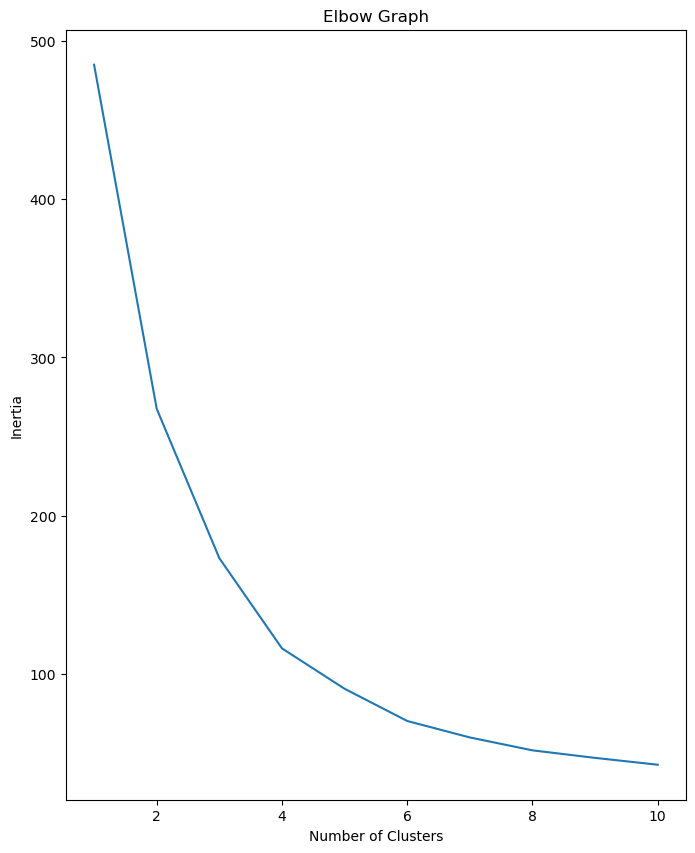

In [99]:
# Elbow Graph
plt.figure(figsize=(8,10))
plt.plot(range(1,11),a)
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Graph')

#### 4 Cluster

In [103]:
kmeans=KMeans(n_clusters=4)
clusterK4=kmeans.fit(df)

C:\Users\my computer\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [104]:
clusterK4.labels_

array([0, 0, 0, ..., 3, 0, 0])

In [116]:
dfk=df.copy()
dfk['cluster_kmeans4']=clusterK4.labels_
dfk

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,cluster_kmeans4
0,0.970414,0.0,0.000034,0.000034,0.000034,0.006000,0.000034,0.000000,0.000000,0.241371,0.000000,0
1,0.940209,0.0,0.000049,0.000049,0.000049,0.010504,0.000098,0.000000,0.000000,0.340437,0.000000,0
2,0.981113,0.0,0.000024,0.000024,0.000024,0.097817,0.000095,0.000000,0.000000,0.166880,0.000000,0
3,0.904428,0.0,0.000061,0.000061,0.000061,0.030605,0.000061,0.000000,0.000000,0.425527,0.000000,0
4,0.912226,0.0,0.000037,0.000009,0.000009,0.404078,0.000243,0.019383,0.000037,0.064718,0.000009,3
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,0.905810,0.0,0.000049,0.000049,0.000049,0.417949,0.000196,0.009805,0.000049,0.068784,0.000049,3
3995,0.999649,0.0,0.000016,0.000016,0.000016,0.015231,0.000078,0.000000,0.000000,0.021659,0.000016,0
3996,0.944948,0.0,0.000039,0.000013,0.000013,0.326726,0.000103,0.000000,0.000000,0.018001,0.000013,3
3997,0.999592,0.0,0.000018,0.000018,0.000018,0.009104,0.000018,0.009104,0.000018,0.025509,0.000000,0


In [117]:
clusterK4.cluster_centers_

array([[9.82878899e-01, 3.71612347e-03, 4.15057209e-05, 3.77179195e-05,
        3.76205578e-05, 8.06914054e-02, 1.57453088e-04, 6.65079627e-03,
        2.12921781e-05, 1.03324885e-01, 4.81770304e-06],
       [5.23653977e-01, 2.37603195e-03, 9.13653056e-05, 4.56081254e-05,
        4.45095230e-05, 7.97866700e-01, 5.07019477e-04, 1.75075997e-02,
        5.89123100e-05, 1.31443994e-01, 3.00837174e-05],
       [6.28081328e-01, 9.30359261e-04, 2.06331617e-04, 2.06128767e-04,
        2.05879951e-04, 1.23980626e-01, 4.76413717e-04, 6.66146530e-03,
        2.24385615e-05, 6.89106611e-01, 2.58980762e-05],
       [8.99048678e-01, 2.03403471e-03, 5.68074076e-05, 3.01913199e-05,
        2.95156437e-05, 4.03089039e-01, 4.02398112e-04, 7.62262675e-03,
        2.24052643e-05, 8.50654942e-02, 9.73901648e-06]])

In [125]:
silhouette_score(df,clusterK4.labels_)

0.4931742021176034

#### 6 Clusters

In [118]:
kmeans1=KMeans(n_clusters=6)
clusterK6=kmeans1.fit(df)

C:\Users\my computer\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [119]:
clusterK6.labels_

array([1, 2, 1, ..., 5, 1, 2])

In [120]:
dfk['cluster_kmeans6']=clusterK6.labels_
dfk

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,cluster_kmeans4,cluster_kmeans6
0,0.970414,0.0,0.000034,0.000034,0.000034,0.006000,0.000034,0.000000,0.000000,0.241371,0.000000,0,1
1,0.940209,0.0,0.000049,0.000049,0.000049,0.010504,0.000098,0.000000,0.000000,0.340437,0.000000,0,2
2,0.981113,0.0,0.000024,0.000024,0.000024,0.097817,0.000095,0.000000,0.000000,0.166880,0.000000,0,1
3,0.904428,0.0,0.000061,0.000061,0.000061,0.030605,0.000061,0.000000,0.000000,0.425527,0.000000,0,2
4,0.912226,0.0,0.000037,0.000009,0.000009,0.404078,0.000243,0.019383,0.000037,0.064718,0.000009,3,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,0.905810,0.0,0.000049,0.000049,0.000049,0.417949,0.000196,0.009805,0.000049,0.068784,0.000049,3,5
3995,0.999649,0.0,0.000016,0.000016,0.000016,0.015231,0.000078,0.000000,0.000000,0.021659,0.000016,0,1
3996,0.944948,0.0,0.000039,0.000013,0.000013,0.326726,0.000103,0.000000,0.000000,0.018001,0.000013,3,5
3997,0.999592,0.0,0.000018,0.000018,0.000018,0.009104,0.000018,0.009104,0.000018,0.025509,0.000000,0,1


In [121]:
clusterK6.cluster_centers_

array([[7.56495576e-01, 2.50629362e-03, 8.26061074e-05, 4.36871065e-05,
        4.25357709e-05, 6.20593504e-01, 4.68569947e-04, 1.46237437e-02,
        4.89810663e-05, 1.13432924e-01, 1.96527190e-05],
       [9.90242805e-01, 3.34882747e-03, 3.48319888e-05, 3.17615017e-05,
        3.16814644e-05, 6.98644699e-02, 1.36646790e-04, 6.55679630e-03,
        2.08133147e-05, 7.72170706e-02, 3.76436198e-06],
       [8.91873045e-01, 4.44072767e-03, 1.24744165e-04, 1.24642629e-04,
        1.24642629e-04, 7.57167917e-02, 3.02011521e-04, 5.80432782e-03,
        1.96049296e-05, 4.11648018e-01, 1.31989250e-05],
       [4.14644791e-01, 1.30104261e-18, 2.28611980e-04, 2.27627266e-04,
        2.27627266e-04, 1.50766683e-01, 5.97513433e-04, 7.35401490e-03,
        2.84888383e-05, 8.48268382e-01, 3.91049405e-05],
       [3.43122180e-01, 1.94657212e-03, 8.76831732e-05, 3.68901300e-05,
        3.64159868e-05, 9.04902707e-01, 5.03618738e-04, 1.47428379e-02,
        4.10358652e-05, 1.35179579e-01, 3.57262125e-

In [124]:
silhouette_score(df,clusterK6.labels_)

0.4781984586963259

# DBSCAN

In [147]:
df

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,0.970414,0.0,0.000034,0.000034,0.000034,0.006000,0.000034,0.000000,0.000000,0.241371,0.000000
1,0.940209,0.0,0.000049,0.000049,0.000049,0.010504,0.000098,0.000000,0.000000,0.340437,0.000000
2,0.981113,0.0,0.000024,0.000024,0.000024,0.097817,0.000095,0.000000,0.000000,0.166880,0.000000
3,0.904428,0.0,0.000061,0.000061,0.000061,0.030605,0.000061,0.000000,0.000000,0.425527,0.000000
4,0.912226,0.0,0.000037,0.000009,0.000009,0.404078,0.000243,0.019383,0.000037,0.064718,0.000009
...,...,...,...,...,...,...,...,...,...,...,...
3994,0.905810,0.0,0.000049,0.000049,0.000049,0.417949,0.000196,0.009805,0.000049,0.068784,0.000049
3995,0.999649,0.0,0.000016,0.000016,0.000016,0.015231,0.000078,0.000000,0.000000,0.021659,0.000016
3996,0.944948,0.0,0.000039,0.000013,0.000013,0.326726,0.000103,0.000000,0.000000,0.018001,0.000013
3997,0.999592,0.0,0.000018,0.000018,0.000018,0.009104,0.000018,0.009104,0.000018,0.025509,0.000000


In [152]:
dbscan=DBSCAN(eps=0.5,min_samples=12)
dbscan.fit(df)

DBSCAN(min_samples=12)

In [153]:
dbscan.labels_

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [155]:
dfd=df.copy()
dfd['cluster_dbscan']=dbscan.labels_
dfd

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,cluster_dbscan
0,0.970414,0.0,0.000034,0.000034,0.000034,0.006000,0.000034,0.000000,0.000000,0.241371,0.000000,0
1,0.940209,0.0,0.000049,0.000049,0.000049,0.010504,0.000098,0.000000,0.000000,0.340437,0.000000,0
2,0.981113,0.0,0.000024,0.000024,0.000024,0.097817,0.000095,0.000000,0.000000,0.166880,0.000000,0
3,0.904428,0.0,0.000061,0.000061,0.000061,0.030605,0.000061,0.000000,0.000000,0.425527,0.000000,0
4,0.912226,0.0,0.000037,0.000009,0.000009,0.404078,0.000243,0.019383,0.000037,0.064718,0.000009,0
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,0.905810,0.0,0.000049,0.000049,0.000049,0.417949,0.000196,0.009805,0.000049,0.068784,0.000049,0
3995,0.999649,0.0,0.000016,0.000016,0.000016,0.015231,0.000078,0.000000,0.000000,0.021659,0.000016,0
3996,0.944948,0.0,0.000039,0.000013,0.000013,0.326726,0.000103,0.000000,0.000000,0.018001,0.000013,0
3997,0.999592,0.0,0.000018,0.000018,0.000018,0.009104,0.000018,0.009104,0.000018,0.025509,0.000000,0
